<a href="https://colab.research.google.com/github/bhanu-nattala/Machine-Learning/blob/master/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **DATASET IMPORTING**

In [ ]:
DataCoSupplyChainDataset = pd.read_csv('DataCoSupplyChainDataset.csv', header= 0,encoding= 'unicode_escape')
DataCoSupplyChainDataset.head()

# **EXPLORATORY DATA ANALYSIS [EDA]**

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [ ]:
DataCoSupplyChainDataset.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
DataCoSupplyChainDataset.shape

(180519, 53)

In [ ]:
DataCoSupplyChainDataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
DataCoSupplyChainDataset.info

<bound method DataFrame.info of             Type  ...   Shipping Mode
0          DEBIT  ...  Standard Class
1       TRANSFER  ...  Standard Class
2           CASH  ...  Standard Class
3          DEBIT  ...  Standard Class
4        PAYMENT  ...  Standard Class
...          ...  ...             ...
180514      CASH  ...  Standard Class
180515     DEBIT  ...    Second Class
180516  TRANSFER  ...  Standard Class
180517   PAYMENT  ...  Standard Class
180518   PAYMENT  ...  Standard Class

[180519 rows x 53 columns]>

# **DATA PROCESSING**

In [ ]:
DataCoSupplyChainDataset.isnull().any()

NameError: ignored

In [ ]:
def data_info(data):
    print('Number of columns : ',data.shape[1])
    print('Number of rows  : ',data.shape[0])
    print('Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features :',len(cat_features))
data_info(DataCoSupplyChainDataset)

Number of columns :  53
Number of rows  :  180519
Total number of data-points : 9567507
Count of Numerical Features : 29
Count of Categorical Features : 24


# **Missing Value Identification**

In [ ]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values ' ,round(x,2) ,'%')
    print('Missing Value Information :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print(i + " = " +str(data[i].isna().sum()))
            
features_with_missing_values(DataCoSupplyChainDataset)

Percentage of Total Missing Values  3.51 %
Missing Value Information :
Customer Lname = 8
Customer Zipcode = 3
Order Zipcode = 155679
Product Description = 180519


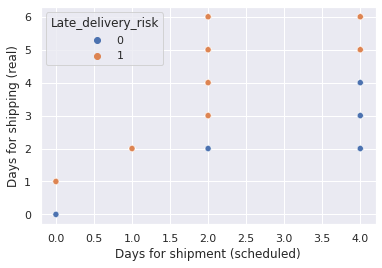

In [ ]:
# Target value analysis
import seaborn as sns
sns.set()
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=DataCoSupplyChainDataset)

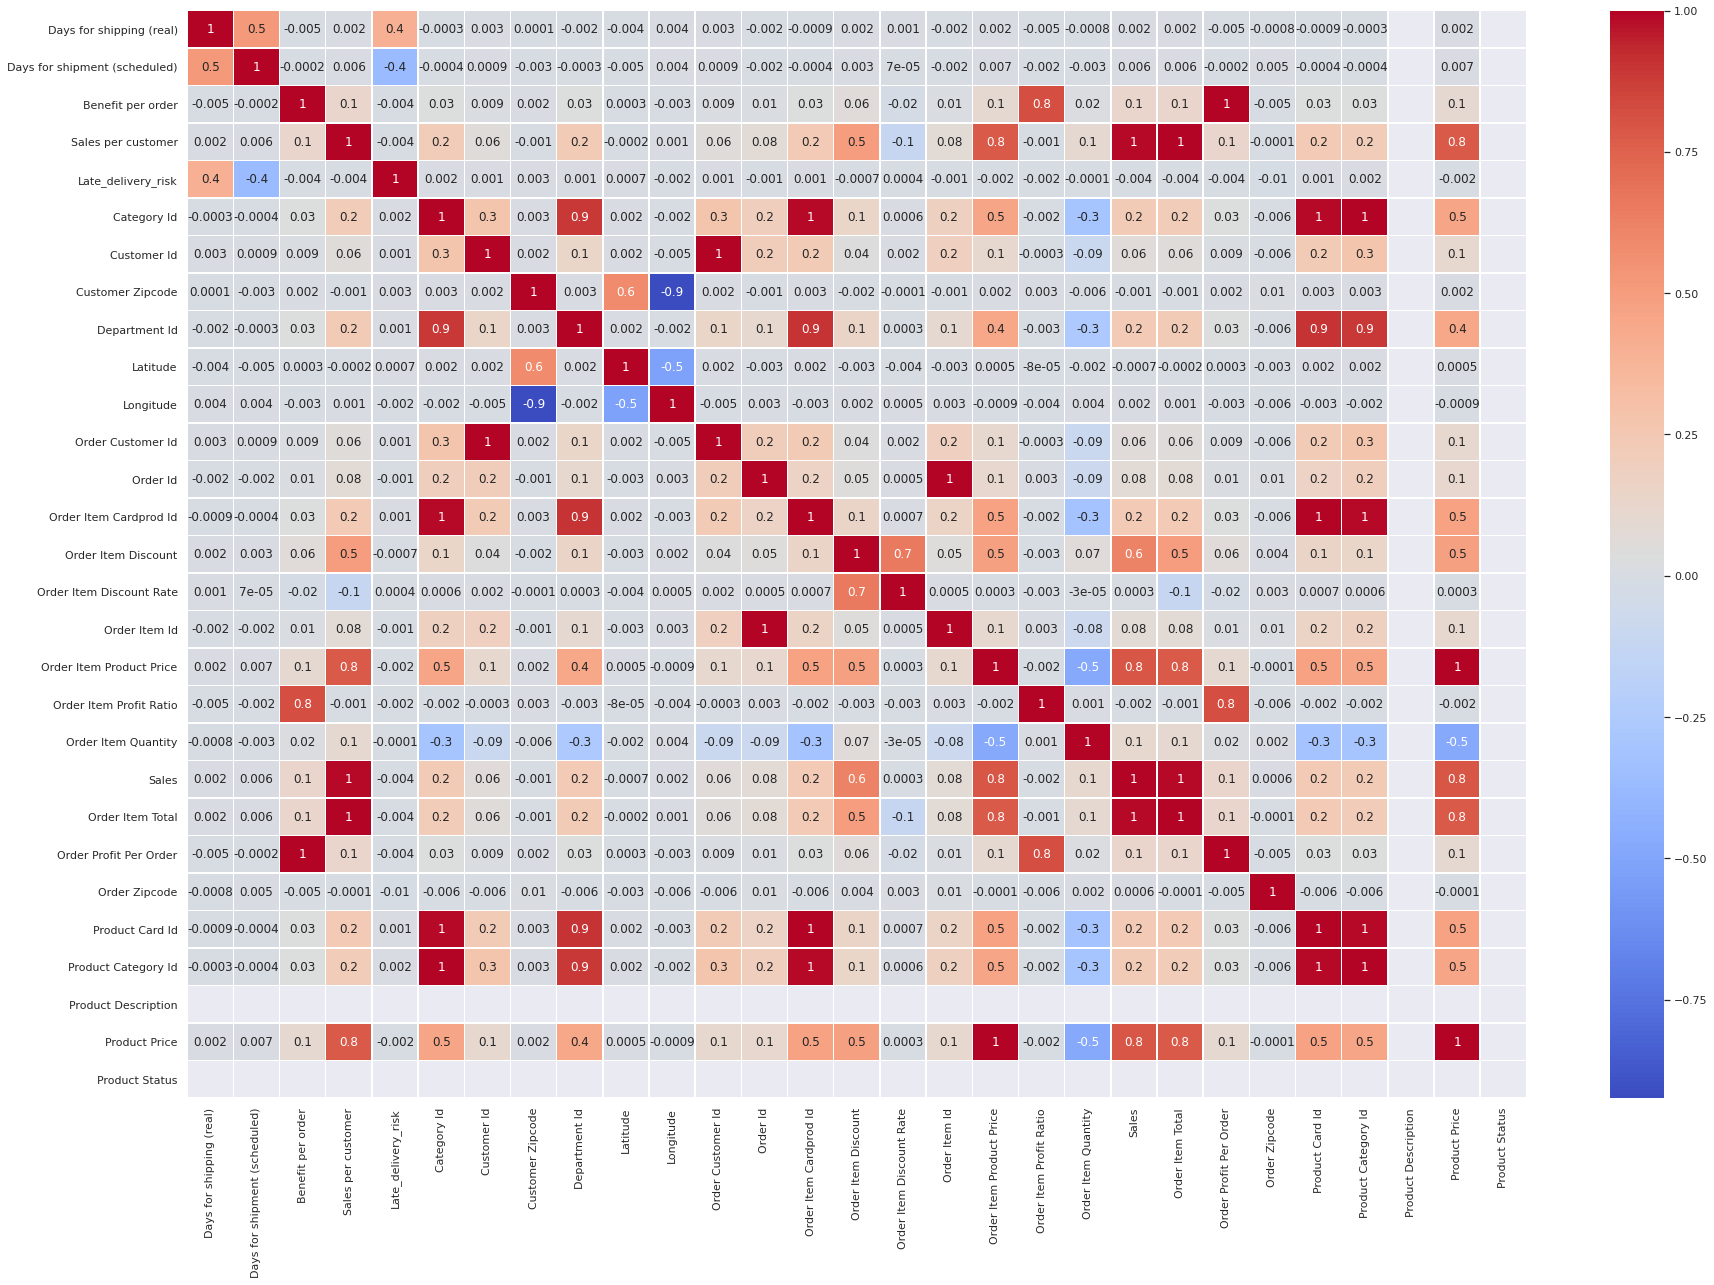

In [ ]:
corrmap = DataCoSupplyChainDataset.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(DataCoSupplyChainDataset[top].corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

In [ ]:
DataCoSupplyChainDataset[['Order Country','Order City', 'Order Status']]

,Order Country,Order City,Order Status
0,Indonesia,Bekasi,COMPLETE
1,India,Bikaner,PENDING
2,India,Bikaner,CLOSED
3,Australia,Townsville,COMPLETE
4,Australia,Townsville,PENDING_PAYMENT
...,...,...,...
180514,China,Shanghái,CLOSED
180515,Japón,Hirakata,COMPLETE
180516,Australia,Adelaide,PENDING
180517,Australia,Adelaide,PENDING_PAYMENT


In [ ]:
DataCoSupplyChainDataset.columns = DataCoSupplyChainDataset.columns.str.replace(' ', '')
print(DataCoSupplyChainDataset)

            Type  ...    ShippingMode
0          DEBIT  ...  Standard Class
1       TRANSFER  ...  Standard Class
2           CASH  ...  Standard Class
3          DEBIT  ...  Standard Class
4        PAYMENT  ...  Standard Class
...          ...  ...             ...
180514      CASH  ...  Standard Class
180515     DEBIT  ...    Second Class
180516  TRANSFER  ...  Standard Class
180517   PAYMENT  ...  Standard Class
180518   PAYMENT  ...  Standard Class

[180519 rows x 53 columns]


# **List all the cities and the respective number of pending orders in 'India'?**

In [ ]:
data = DataCoSupplyChainDataset.loc[:,'OrderCity':'OrderStatus']
data.drop(['OrderCustomerId','orderdate(DateOrders)','OrderId','OrderItemCardprodId','OrderItemDiscount','OrderItemDiscountRate','OrderItemId','OrderItemProductPrice','OrderItemProfitRatio','OrderItemQuantity','Sales','OrderItemTotal','OrderProfitPerOrder','OrderRegion'], axis='columns', inplace=True)

In [ ]:
country1 = data[(data['OrderCountry'] == 'India')]
status1 = country1[(data['OrderStatus'] == 'PENDING')]
np.array(status1)
status1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,OrderCity,OrderCountry,OrderState,OrderStatus
1,Bikaner,India,Rajastán,PENDING
21,Jabalpur,India,Madhya Pradesh,PENDING
45,Bangalore,India,Karnataka,PENDING
46,Bangalore,India,Karnataka,PENDING
382,Pune,India,Maharashtra,PENDING


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


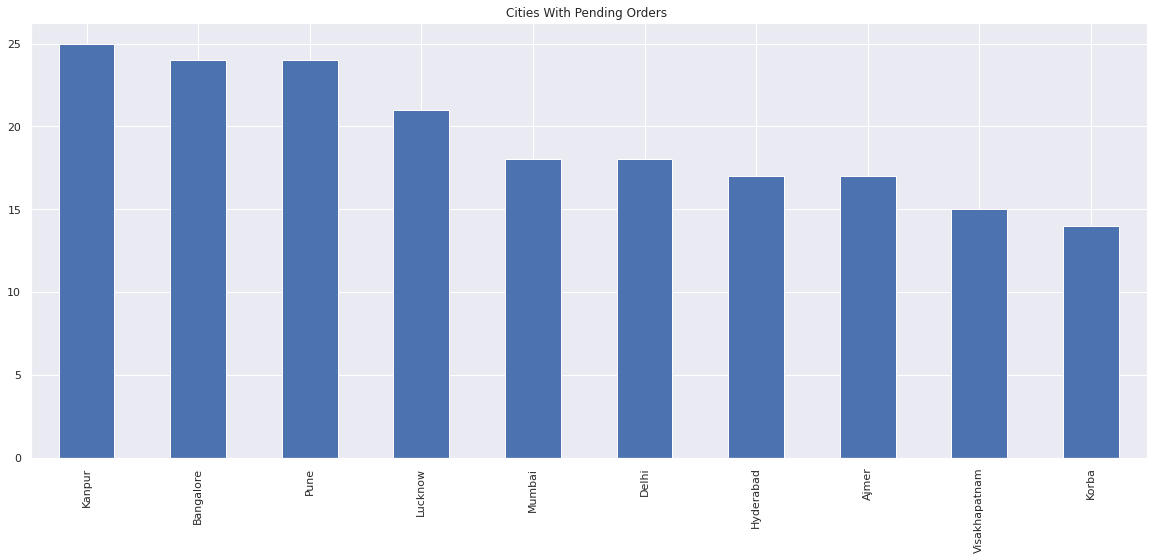

In [ ]:
#city = DataCoSupplyChainDataset.groupby('OrderCity') #Grouping by city
#country = DataCoSupplyChainDataset.groupby('OrderCountry')
#status = DataCoSupplyChainDataset.groupby('OrderStatus')
country = DataCoSupplyChainDataset[(DataCoSupplyChainDataset['OrderCountry'] == 'India')]
status = country[(DataCoSupplyChainDataset['OrderStatus'] == 'PENDING')]
plt.figure(1)
status['OrderCity'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Cities With Pending Orders ")
#count1 = country1['OrderStatus'].value_counts()
#names=DataCoSupplyChainDataset['OrderCity'].value_counts().keys()


# **Which country has the most suspected fraud?**

In [ ]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = DataCoSupplyChainDataset[(DataCoSupplyChainDataset['Type'] != 'TRANSFER')&(DataCoSupplyChainDataset['OrderStatus'] == 'SUSPECTED_FRAUD')]
xyz['OrderCountry'].value_counts()

Series([], Name: OrderCountry, dtype: int64)

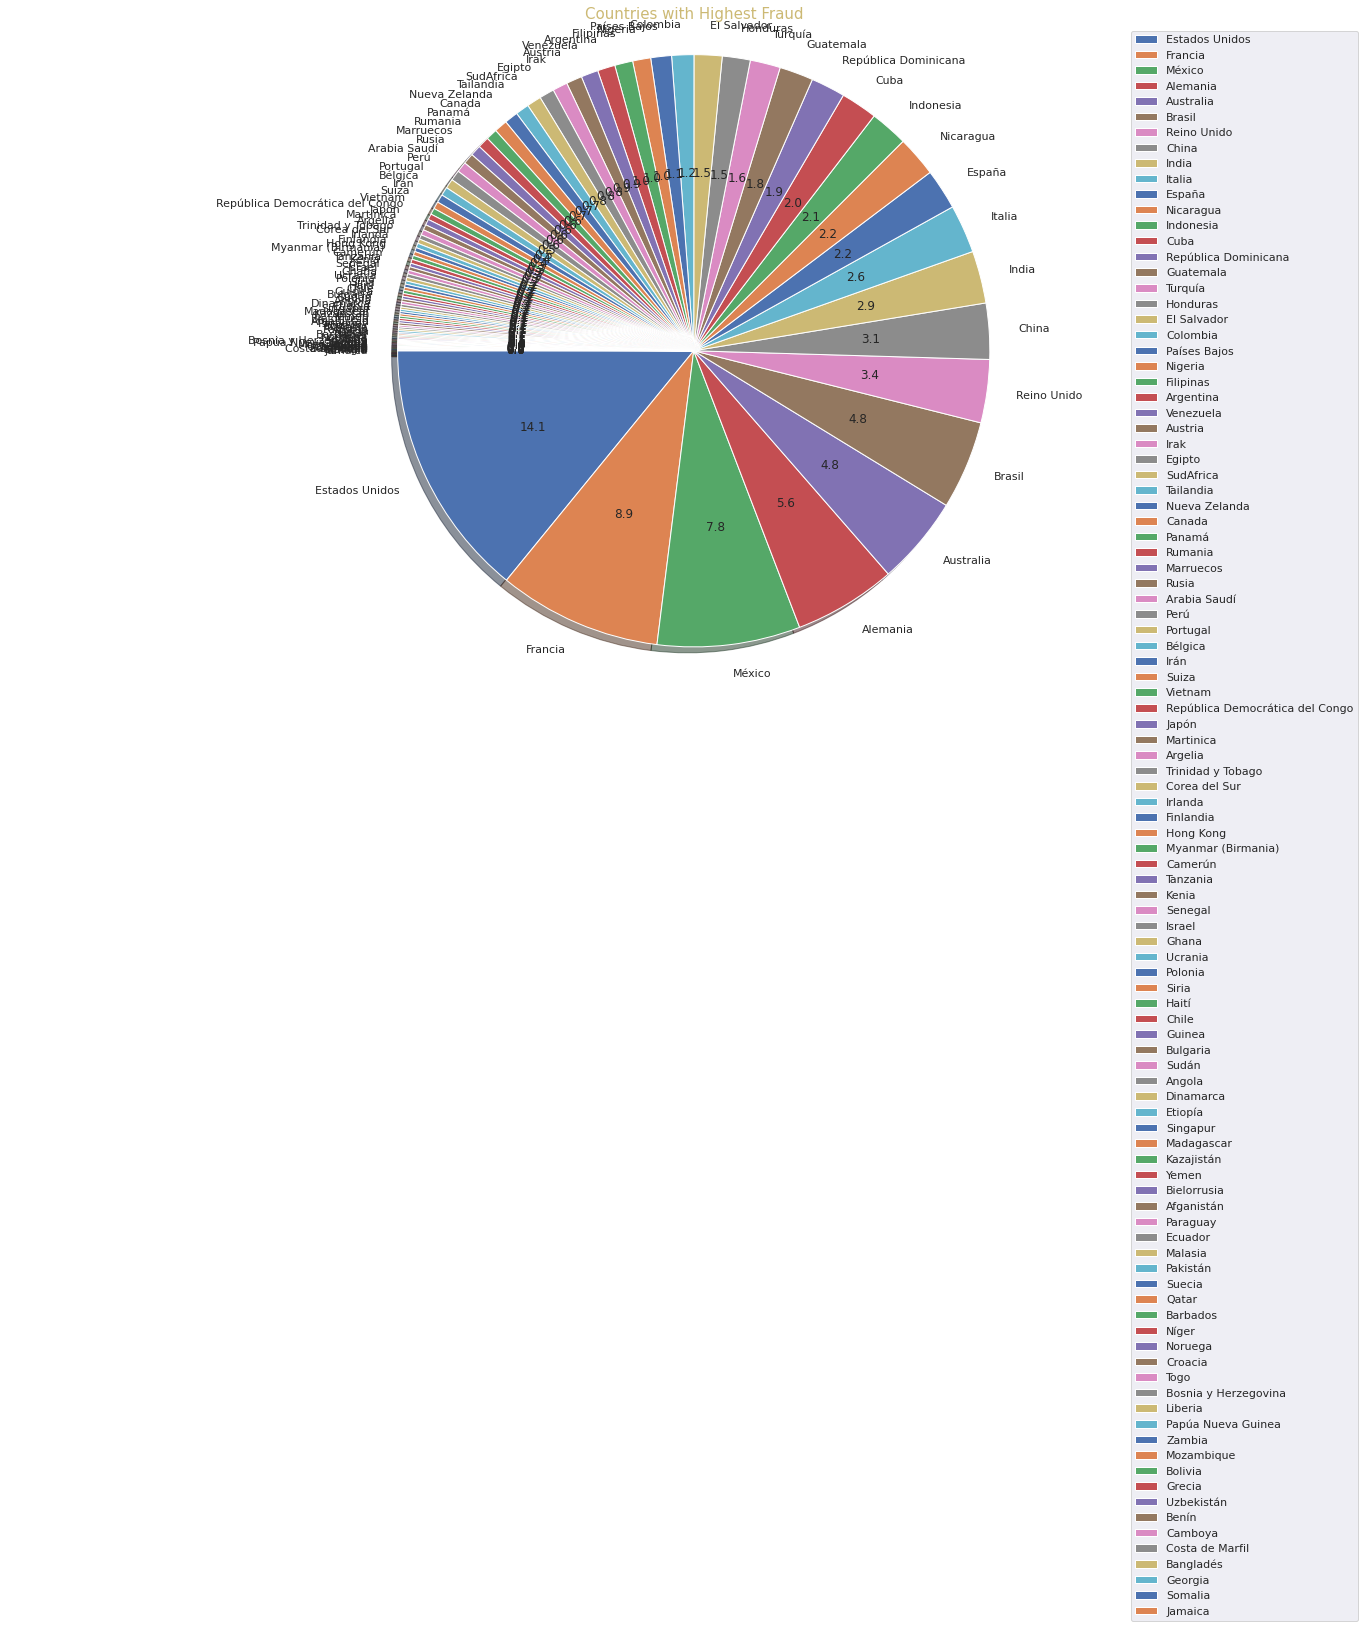

In [ ]:
high_fraud = DataCoSupplyChainDataset[(DataCoSupplyChainDataset['OrderStatus'] == 'SUSPECTED_FRAUD') & (DataCoSupplyChainDataset['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['OrderCountry'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=None,autopct='%.1f',shadow=True,)
plt.title("Countries with Highest Fraud",size=15,color='y') # Plotting title
plt.ylabel(" ")
fraud.axis('equal')
plt.legend() 
plt.show()

# **Which product(s) has/have the maximum discount?**

In [ ]:
new_data = DataCoSupplyChainDataset.loc[:,'OrderItemDiscount':'ProductName']
new_data.drop(['OrderItemDiscountRate','OrderItemId','OrderItemProductPrice','OrderItemProfitRatio','OrderItemQuantity','Sales','OrderItemTotal','OrderProfitPerOrder','OrderRegion','OrderState',	'OrderStatus','OrderZipcode','ProductCardId','ProductCategoryId','ProductDescription','ProductImage'], axis='columns', inplace=True)

In [ ]:
#new_data.max()
#np.array(new_data)
#new_data.head()

In [ ]:
new_data.OrderItemDiscount.max()

500.0

In [ ]:
discount = new_data[(new_data['OrderItemDiscount']==500.0)]
np.array(discount)

array([[500.0, 'SOLE E35 Elliptical']], dtype=object)

In [ ]:
discount.head()

,OrderItemDiscount,ProductName
12606,500.0,SOLE E35 Elliptical


# **Which year had the minimum sales for "Nike" products?**

In [ ]:
DataCoSupplyChainDataset[['Sales','ProductName','orderdate(DateOrders)']]

,Sales,ProductName,orderdate(DateOrders)
0,327.750000,Smart watch,1/31/2018 22:56
1,327.750000,Smart watch,1/13/2018 12:27
2,327.750000,Smart watch,1/13/2018 12:06
3,327.750000,Smart watch,1/13/2018 11:45
4,327.750000,Smart watch,1/13/2018 11:24
...,...,...,...
180514,399.980011,Field & Stream Sportsman 16 Gun Fire Safe,1/16/2016 3:40
180515,399.980011,Field & Stream Sportsman 16 Gun Fire Safe,1/16/2016 1:34
180516,399.980011,Field & Stream Sportsman 16 Gun Fire Safe,1/15/2016 21:00
180517,399.980011,Field & Stream Sportsman 16 Gun Fire Safe,1/15/2016 20:18


In [ ]:
DataCoSupplyChainDataset['orderdate'] = pd.to_datetime(DataCoSupplyChainDataset['orderdate(DateOrders)'])
DataCoSupplyChainDataset['shippingdate']=pd.to_datetime(DataCoSupplyChainDataset['shippingdate(DateOrders)'])

In [ ]:
DataCoSupplyChainDataset['orderday'] = pd.DatetimeIndex(DataCoSupplyChainDataset['orderdate']).day
DataCoSupplyChainDataset['ordermonth'] = pd.DatetimeIndex(DataCoSupplyChainDataset['orderdate']).month
DataCoSupplyChainDataset['orderyear'] = pd.DatetimeIndex(DataCoSupplyChainDataset['orderdate']).year

DataCoSupplyChainDataset['shippingday'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shippingdate']).day
DataCoSupplyChainDataset['shippingmonth'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shippingdate']).month
DataCoSupplyChainDataset['shippingyear'] = pd.DatetimeIndex(DataCoSupplyChainDataset['shippingdate']).year

In [ ]:
new_dataset_features = ['Type','Daysforshipping(real)','Daysforshipment(scheduled)','Late_delivery_risk','Benefitperorder',
                        'Salespercustomer','Sales','Latitude','Longitude','ShippingMode','OrderStatus','OrderRegion',
                        'OrderCountry','OrderCity','Market','ProductName','DeliveryStatus','orderday','ordermonth','orderyear',
                        'shippingday','shippingmonth','shippingyear']
len(new_dataset_features)

23

In [ ]:
new_data = DataCoSupplyChainDataset[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Daysforshipping(real),Daysforshipment(scheduled),Late_delivery_risk,Benefitperorder,Salespercustomer,Sales,Latitude,Longitude,ShippingMode,OrderStatus,OrderRegion,OrderCountry,OrderCity,Market,ProductName,DeliveryStatus,orderday,ordermonth,orderyear,shippingday,shippingmonth,shippingyear
0,DEBIT,3,4,0,91.250000,314.640015,327.75,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Smart watch,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,327.75,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Smart watch,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,327.75,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Smart watch,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,327.75,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Smart watch,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,327.75,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Smart watch,Advance shipping,13,1,2018,15,1,2018


In [ ]:
new_data.describe()

In [ ]:
model_data = pd.get_dummies(model_data)
model_data.shape

(180519, 3942)

In [ ]:
data = DataCoSupplyChainDataset[['Sales','orderyear','ProductName']]

In [ ]:
sub = "Nike"
data["Indexes"]= data["ProductName"].str.find(sub)
product = data[(data["Indexes"]!= -1)]
#np.array(product)
product.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sales,orderyear,ProductName,Indexes
50,100.000000,2016,Nike Men's Dri-FIT Victory Golf Polo,0
52,100.000000,2016,Nike Men's Dri-FIT Victory Golf Polo,0
53,100.000000,2016,Nike Men's Dri-FIT Victory Golf Polo,0
54,100.000000,2015,Nike Men's Dri-FIT Victory Golf Polo,0
59,299.970001,2016,Nike Men's Free 5.0+ Running Shoe,0


In [ ]:
int_sales = product.Sales.astype(int)
min_sales = int_sales.min()
np.array(min_sales)

array(22)

In [ ]:
sales = product[(data['Sales']==min_sales)]
np.array(sales)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([[22.0, 2017, 'Nike Dri-FIT Crew Sock 6 Pack', 0],
       [22.0, 2017, 'Nike Dri-FIT Crew Sock 6 Pack', 0],
       [22.0, 2017, 'Nike Dri-FIT Crew Sock 6 Pack', 0],
       ...,
       [22.0, 2015, 'Nike Dri-FIT Crew Sock 6 Pack', 0],
       [22.0, 2015, 'Nike Dri-FIT Crew Sock 6 Pack', 0],
       [22.0, 2015, 'Nike Dri-FIT Crew Sock 6 Pack', 0]], dtype=object)

In [ ]:
sales.drop(['ProductName','Indexes'], axis='columns', inplace=True)
sales.head()

,Sales,orderyear
2571,22.0,2017
2575,22.0,2017
2576,22.0,2017
2587,22.0,2017
2591,22.0,2017


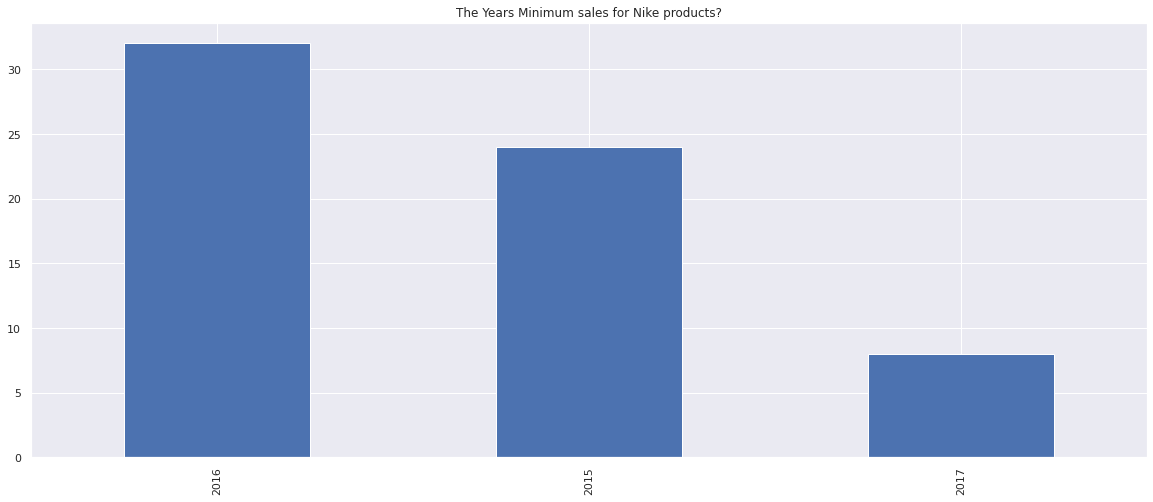

In [ ]:
plt.figure(1)
sales['orderyear'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="The Years Minimum sales for Nike products?")

# **How many successfully processed orders have days for shipping real (Real)>Days for shipment (Scheduled)?**

In [ ]:
np.set_printoptions(suppress=True, threshold=20)
x = np.array(DataCoSupplyChainDataset['Daysforshipping(real)'])
x

array([3, 5, 4, ..., 5, 3, 4])

In [ ]:
np.set_printoptions(suppress=True, threshold=20)
y = np.array(DataCoSupplyChainDataset['Daysforshipment(scheduled)'])
y

array([4, 4, 4, ..., 4, 4, 4])

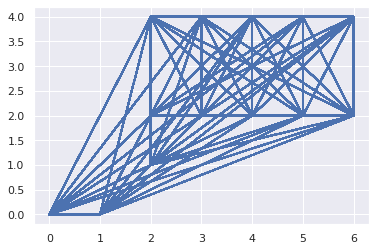

In [ ]:
plt.plot(x, y)

In [ ]:
np.set_printoptions(suppress=True, threshold=20)
result = np.array(np.where(DataCoSupplyChainDataset['Daysforshipping(real)']>DataCoSupplyChainDataset['Daysforshipment(scheduled)']))
y = result
result

array([[     1,      5,      6, ..., 180512, 180515, 180516]])